서울 자치구별..
-범죄발생수/1인가구수      /누적 코로나확진자수/누적 코로나로 인한 사망자수 간의 관계
-범죄발생수/1인가구수 데이터 기간(2015~2022)
-코로나확진자/사망자수 데이터 기간(2020~)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 범죄건수데이터

In [2]:
# 데이터 읽기
crime = pd.read_csv("data-files/crime.csv")
crime.info()
crime.columns
crime.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 98 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자치구별(1)  28 non-null     object
 1   자치구별(2)  28 non-null     object
 2   2015     28 non-null     object
 3   2015.1   28 non-null     object
 4   2015.2   28 non-null     object
 5   2015.3   28 non-null     object
 6   2015.4   28 non-null     object
 7   2015.5   28 non-null     object
 8   2015.6   28 non-null     object
 9   2015.7   28 non-null     object
 10  2015.8   28 non-null     object
 11  2015.9   28 non-null     object
 12  2015.10  28 non-null     object
 13  2015.11  28 non-null     object
 14  2016     28 non-null     object
 15  2016.1   28 non-null     object
 16  2016.2   28 non-null     object
 17  2016.3   28 non-null     object
 18  2016.4   28 non-null     object
 19  2016.5   28 non-null     object
 20  2016.6   28 non-null     object
 21  2016.7   28 non-null     object
 22  2016

,자치구별(1),자치구별(2),2015,2015.1,2015.2,2015.3,2015.4,2015.5,2015.6,2015.7,...,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8,2022.9,2022.10,2022.11
0,자치구별(1),자치구별(2),소계,소계,살인,살인,강도,강도,강간·강제추행,강간·강제추행,...,살인,살인,강도,강도,강간·강제추행,강간·강제추행,절도,절도,폭력,폭력
1,자치구별(1),자치구별(2),발생,검거,발생,검거,발생,검거,발생,검거,...,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
2,합계,소계,126401,82680,163,156,276,257,5449,5069,...,104,98,117,112,5816,5344,37579,20205,46783,39338
3,합계,종로구,4705,4430,6,8,11,13,211,1139,...,2,3,8,8,228,988,1313,932,1587,1353
4,합계,중구,4954,2942,3,2,9,6,170,111,...,1,2,5,4,194,123,1365,724,1506,1266


In [3]:
#범죄 발생 연도별 합계 열 + 자치구 열만 추출
crime_edited = crime[crime.columns[[1,2,14,26,38,50,62,74,86]]]
crime_edited.head()

,자치구별(2),2015,2016,2017,2018,2019,2020,2021,2022
0,자치구별(2),소계,소계,소계,소계,소계,소계,소계,소계
1,자치구별(2),발생,발생,발생,발생,발생,발생,발생,발생
2,소계,126401,117839,107835,101948,103668,92679,80445,90399
3,종로구,4705,4459,4057,3690,3846,3102,2712,3138
4,중구,4954,4584,4184,4030,4327,3411,2861,3071


In [4]:
#필요 없는 행 제거 작업
crime_edited = crime_edited.drop([0,1,2], axis=0)
crime_edited.head()

,자치구별(2),2015,2016,2017,2018,2019,2020,2021,2022
3,종로구,4705,4459,4057,3690,3846,3102,2712,3138
4,중구,4954,4584,4184,4030,4327,3411,2861,3071
5,용산구,3820,4137,4060,3411,3313,2969,2381,2967
6,성동구,3358,3026,2767,2457,2512,2362,2112,2194
7,광진구,5909,5322,4646,3915,4011,3601,3087,3619


In [5]:
# 자료형 #str -> int로 일괄 변환 (astype 사용)
for year in crime_edited.columns[1:]:
    crime_edited[year] = crime_edited[year].astype('int')
crime_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 3 to 27
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자치구별(2)  25 non-null     object
 1   2015     25 non-null     int32 
 2   2016     25 non-null     int32 
 3   2017     25 non-null     int32 
 4   2018     25 non-null     int32 
 5   2019     25 non-null     int32 
 6   2020     25 non-null     int32 
 7   2021     25 non-null     int32 
 8   2022     25 non-null     int32 
dtypes: int32(8), object(1)
memory usage: 1.1+ KB


In [6]:
#index reset
crime_edited.reset_index(drop=True, inplace=True)
crime_edited.head()

,자치구별(2),2015,2016,2017,2018,2019,2020,2021,2022
0,종로구,4705,4459,4057,3690,3846,3102,2712,3138
1,중구,4954,4584,4184,4030,4327,3411,2861,3071
2,용산구,3820,4137,4060,3411,3313,2969,2381,2967
3,성동구,3358,3026,2767,2457,2512,2362,2112,2194
4,광진구,5909,5322,4646,3915,4011,3601,3087,3619


In [7]:
#컬럼명 변경
crime_edited.rename(columns= {"자치구별(2)":"자치구"}, inplace=True)
crime_edited.head()

,자치구,2015,2016,2017,2018,2019,2020,2021,2022
0,종로구,4705,4459,4057,3690,3846,3102,2712,3138
1,중구,4954,4584,4184,4030,4327,3411,2861,3071
2,용산구,3820,4137,4060,3411,3313,2969,2381,2967
3,성동구,3358,3026,2767,2457,2512,2362,2112,2194
4,광진구,5909,5322,4646,3915,4011,3601,3087,3619


In [8]:
# 각 구별 총 합계 계산. 계산 후 "합계" 행 새로 추가
sum_of_areas = crime_edited.iloc[: , 1:].sum(axis=1)
crime_edited["합계"] = sum_of_areas
crime_edited.head()

,자치구,2015,2016,2017,2018,2019,2020,2021,2022,합계
0,종로구,4705,4459,4057,3690,3846,3102,2712,3138,29709
1,중구,4954,4584,4184,4030,4327,3411,2861,3071,31422
2,용산구,3820,4137,4060,3411,3313,2969,2381,2967,27058
3,성동구,3358,3026,2767,2457,2512,2362,2112,2194,20788
4,광진구,5909,5322,4646,3915,4011,3601,3087,3619,34110


# 1인가구데이터 (동일작업.생략)

In [9]:
single_household = pd.read_csv("data-files/single_household.csv")
single_household.info()
single_household.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자치구별(1)  25 non-null     object
 1   자치구별(2)  25 non-null     object
 2   성별(1)    25 non-null     object
 3   2015     25 non-null     int64 
 4   2016     25 non-null     int64 
 5   2017     25 non-null     int64 
 6   2018     25 non-null     int64 
 7   2019     25 non-null     int64 
 8   2020     25 non-null     int64 
 9   2021     25 non-null     int64 
 10  2022     25 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 2.3+ KB


,자치구별(1),자치구별(2),성별(1),2015,2016,2017,2018,2019,2020,2021,2022
0,합계,종로구,계,22776,22835,23638,25326,24671,25983,27308,28424
1,합계,중구,계,19161,19671,20164,20803,22078,22818,24544,25247
2,합계,용산구,계,31025,31641,33076,34240,35148,36881,39270,41437
3,합계,성동구,계,35259,37074,39067,40706,41488,42585,44946,46548
4,합계,광진구,계,54210,53169,54866,56337,58714,62301,66140,69391


In [10]:
# 사용하지 않는 열 제거
single_household.drop(["자치구별(1)","성별(1)"], axis=1, inplace=True)
single_household.head()

,자치구별(2),2015,2016,2017,2018,2019,2020,2021,2022
0,종로구,22776,22835,23638,25326,24671,25983,27308,28424
1,중구,19161,19671,20164,20803,22078,22818,24544,25247
2,용산구,31025,31641,33076,34240,35148,36881,39270,41437
3,성동구,35259,37074,39067,40706,41488,42585,44946,46548
4,광진구,54210,53169,54866,56337,58714,62301,66140,69391


In [11]:
# 컬럼명 변경("자치구"로 통일)
single_household.rename(columns={"자치구별(2)":"자치구"}, inplace=True)
single_household.head()

,자치구,2015,2016,2017,2018,2019,2020,2021,2022
0,종로구,22776,22835,23638,25326,24671,25983,27308,28424
1,중구,19161,19671,20164,20803,22078,22818,24544,25247
2,용산구,31025,31641,33076,34240,35148,36881,39270,41437
3,성동구,35259,37074,39067,40706,41488,42585,44946,46548
4,광진구,54210,53169,54866,56337,58714,62301,66140,69391


In [12]:
# 자료형 #str -> int로 일괄 변환 (astype)
for year in single_household.columns[1:]:
    single_household[year] = single_household[year].astype('int')
single_household.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구     25 non-null     object
 1   2015    25 non-null     int32 
 2   2016    25 non-null     int32 
 3   2017    25 non-null     int32 
 4   2018    25 non-null     int32 
 5   2019    25 non-null     int32 
 6   2020    25 non-null     int32 
 7   2021    25 non-null     int32 
 8   2022    25 non-null     int32 
dtypes: int32(8), object(1)
memory usage: 1.1+ KB


In [13]:
# 각 구별 총 합계 계산. 계산 후 "합계" 행 새로 추가
a = single_household.iloc[: , 1:].sum(axis=1)
single_household["합계"] = a
single_household.head()

,자치구,2015,2016,2017,2018,2019,2020,2021,2022,합계
0,종로구,22776,22835,23638,25326,24671,25983,27308,28424,200961
1,중구,19161,19671,20164,20803,22078,22818,24544,25247,174486
2,용산구,31025,31641,33076,34240,35148,36881,39270,41437,282718
3,성동구,35259,37074,39067,40706,41488,42585,44946,46548,327673
4,광진구,54210,53169,54866,56337,58714,62301,66140,69391,475128


# 인구 데이터

In [14]:
population = pd.read_csv("data-files/population.csv")
population.info()
population.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(시군구)별  26 non-null     object
 1   2015        26 non-null     object
 2   2016        26 non-null     object
 3   2017        26 non-null     object
 4   2018        26 non-null     object
 5   2019        26 non-null     object
 6   2020        26 non-null     object
 7   2021        26 non-null     object
 8   2022        26 non-null     object
dtypes: object(9)
memory usage: 2.0+ KB


,행정구역(시군구)별,2015,2016,2017,2018,2019,2020,2021,2022
0,행정구역(시군구)별,총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명)
1,종로구,154986,152737,154770,153065,151290,149384,144683,141379
2,중구,125733,125249,125709,125725,126171,125240,122499,120437
3,용산구,233342,230241,229161,228999,228670,230040,222953,218650
4,성동구,297003,299259,304808,308221,300889,293556,285990,281000


In [15]:
# 0번째 행 삭제
population.drop(index=0, axis=0, inplace=True)
population.head()

,행정구역(시군구)별,2015,2016,2017,2018,2019,2020,2021,2022
1,종로구,154986,152737,154770,153065,151290,149384,144683,141379
2,중구,125733,125249,125709,125725,126171,125240,122499,120437
3,용산구,233342,230241,229161,228999,228670,230040,222953,218650
4,성동구,297003,299259,304808,308221,300889,293556,285990,281000
5,광진구,360369,357215,357703,355559,351350,346682,339996,337416


In [16]:
# "자치구" 열명으로 변경
population.rename(columns= {"행정구역(시군구)별":"자치구"}, inplace=True)
population.head()

,자치구,2015,2016,2017,2018,2019,2020,2021,2022
1,종로구,154986,152737,154770,153065,151290,149384,144683,141379
2,중구,125733,125249,125709,125725,126171,125240,122499,120437
3,용산구,233342,230241,229161,228999,228670,230040,222953,218650
4,성동구,297003,299259,304808,308221,300889,293556,285990,281000
5,광진구,360369,357215,357703,355559,351350,346682,339996,337416


In [17]:
# 자료형 #str -> int로 일괄 변환 (astype)
for year in population.columns[1:]:
    population[year] = population[year].astype('int')
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구     25 non-null     object
 1   2015    25 non-null     int32 
 2   2016    25 non-null     int32 
 3   2017    25 non-null     int32 
 4   2018    25 non-null     int32 
 5   2019    25 non-null     int32 
 6   2020    25 non-null     int32 
 7   2021    25 non-null     int32 
 8   2022    25 non-null     int32 
dtypes: int32(8), object(1)
memory usage: 1.1+ KB


In [18]:
# "합계" 열 생성
b = population[population.columns[1:]].sum(axis=1)
population["합계"] = b
population.head()

## 이외 방법
# population.drop("자치구", axis=1)
# population.loc[:, "2015":'2022']

,자치구,2015,2016,2017,2018,2019,2020,2021,2022,합계
1,종로구,154986,152737,154770,153065,151290,149384,144683,141379,1202294
2,중구,125733,125249,125709,125725,126171,125240,122499,120437,996763
3,용산구,233342,230241,229161,228999,228670,230040,222953,218650,1822056
4,성동구,297003,299259,304808,308221,300889,293556,285990,281000,2370726
5,광진구,360369,357215,357703,355559,351350,346682,339996,337416,2806290


In [19]:
# reset index
population.reset_index(drop=True, inplace=True)
population.head()

,자치구,2015,2016,2017,2018,2019,2020,2021,2022,합계
0,종로구,154986,152737,154770,153065,151290,149384,144683,141379,1202294
1,중구,125733,125249,125709,125725,126171,125240,122499,120437,996763
2,용산구,233342,230241,229161,228999,228670,230040,222953,218650,1822056
3,성동구,297003,299259,304808,308221,300889,293556,285990,281000,2370726
4,광진구,360369,357215,357703,355559,351350,346682,339996,337416,2806290


# 3개 합계 데이터 Merge

In [21]:
pop_hap = population[["자치구","합계"]]
single_hap = single_household[["자치구","합계"]]
crime_hap = crime_edited[["자치구","합계"]]

In [22]:
pop_hap.head()
single_hap.head()
crime_hap.head()

,자치구,합계
0,종로구,29709
1,중구,31422
2,용산구,27058
3,성동구,20788
4,광진구,34110


In [23]:
# 3개 df merge. "자치구" 열 기준으로
merged = pd.merge(crime_hap, (pd.merge(pop_hap, single_hap, on="자치구")), on="자치구")
merged.head()

,자치구,합계,합계_x,합계_y
0,종로구,29709,1202294,200961
1,중구,31422,996763,174486
2,용산구,27058,1822056,282718
3,성동구,20788,2370726,327673
4,광진구,34110,2806290,475128


In [24]:
# column 명 변경
merged.rename(columns={"합계":"범죄발생건수", "합계_x":"총인구", "합계_y":"1인가구수"}, inplace=True)
merged.head()

,자치구,범죄발생건수,총인구,1인가구수
0,종로구,29709,1202294,200961
1,중구,31422,996763,174486
2,용산구,27058,1822056,282718
3,성동구,20788,2370726,327673
4,광진구,34110,2806290,475128


In [25]:
# "1인가구비율" 계산 후 컬럼 생성
hap = merged["1인가구수"]/merged["총인구"]
merged["1인가구비율"] = hap
merged.head()

,자치구,범죄발생건수,총인구,1인가구수,1인가구비율
0,종로구,29709,1202294,200961,0.167148
1,중구,31422,996763,174486,0.175053
2,용산구,27058,1822056,282718,0.155164
3,성동구,20788,2370726,327673,0.138216
4,광진구,34110,2806290,475128,0.169308


In [26]:
# "자치구" 열을 index로 지정 (굳이 필요 없는 작업이지만, corr table할 때 필요한줄 알고 전부 이런 형태로 작업)
merged.set_index("자치구", drop=True, inplace=True)

# 시각화

In [28]:
merged.head()

,범죄발생건수,총인구,1인가구수,1인가구비율
자치구,,,,
종로구,29709,1202294,200961,0.167148
중구,31422,996763,174486,0.175053
용산구,27058,1822056,282718,0.155164
성동구,20788,2370726,327673,0.138216
광진구,34110,2806290,475128,0.169308


In [29]:
# 각 변수 기초통계량 - 큰 의미 없음
merged.describe()

,범죄발생건수,총인구,1인가구수,1인가구비율
count,25.00000,2.500000e+01,25.000000,25.000000
mean,32848.56000,3.116450e+06,416365.320000,0.138280
std,9074.76806,1.034727e+06,154790.298789,0.034669
min,17640.00000,9.967630e+05,174486.000000,0.080406
25%,27057.00000,2.516562e+06,327673.000000,0.109523
50%,31422.00000,3.147320e+06,421227.000000,0.135283
75%,38125.00000,3.698209e+06,475128.000000,0.158969
max,59752.00000,5.310324e+06,954656.000000,0.239300


In [32]:
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams["axes.unicode_minus"] = False

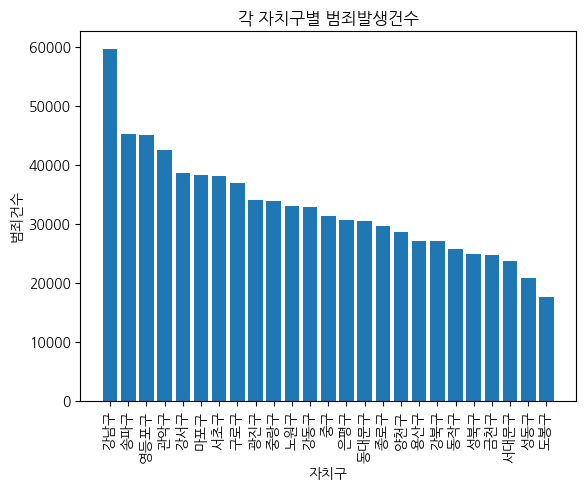

In [33]:
# 각 자치구별 범죄발생건수 bar plot로 내림차순서 표시
x = merged.sort_values(by="범죄발생건수", ascending=False).index
y = merged.sort_values(by="범죄발생건수", ascending=False)["범죄발생건수"]

plt.bar(x, y, data=merged)
plt.title("각 자치구별 범죄발생건수")
plt.xlabel("자치구")
plt.ylabel("범죄건수")
plt.xticks(rotation=90)
plt.show()

Axes(0.125,0.53;0.775x0.35)


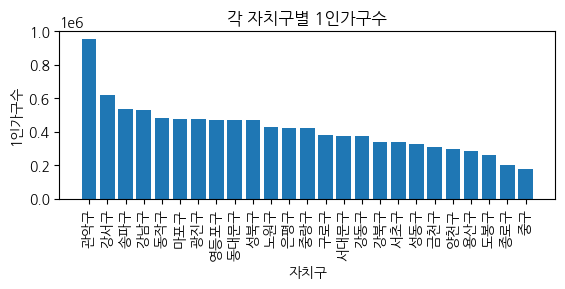

Axes(0.125,0.11;0.775x0.35)


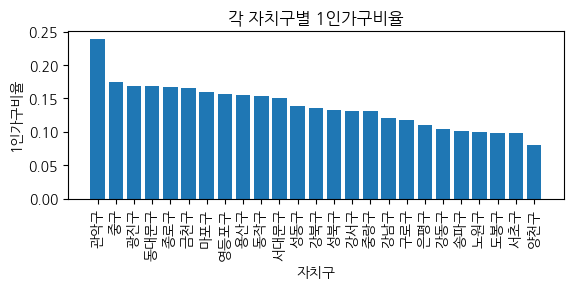

In [34]:
# 각 자치구별 1인가구수 bar plot로 내림차순서 표시
x1 = merged.sort_values(by="1인가구수", ascending=False).index
y1 = merged.sort_values(by="1인가구수", ascending=False)["1인가구수"]

ax1 = plt.subplot(2,1,1)
plt.bar(x1, y1, data=merged)
plt.title("각 자치구별 1인가구수")
plt.xlabel("자치구")
plt.ylabel("1인가구수")
plt.xticks(rotation=90)
print(ax1)
plt.show()

# 각 자치구별 1인가구비율 bar plot로 내림차순서 표시
x2 = merged.sort_values(by="1인가구비율", ascending=False).index
y2 = merged.sort_values(by="1인가구비율", ascending=False)["1인가구비율"]

ax2 = plt.subplot(2,1,2)
plt.bar(x2, y2, data=merged)
plt.title("각 자치구별 1인가구비율")
plt.xlabel("자치구")
plt.ylabel("1인가구비율")
plt.xticks(rotation=90)
print(ax2)
plt.show()

# 관안구, 중구, 종로구

In [35]:
# 각 변수간 상관관계
my_corr = merged.corr(method='pearson')
my_corr

# 1인가구비율 / 범죄발생건수 양의 상관관계? no

,범죄발생건수,총인구,1인가구수,1인가구비율
범죄발생건수,1.000000,0.551017,0.528124,0.038883
총인구,0.551017,1.000000,0.652671,-0.423318
1인가구수,0.528124,0.652671,1.000000,0.390108
1인가구비율,0.038883,-0.423318,0.390108,1.000000


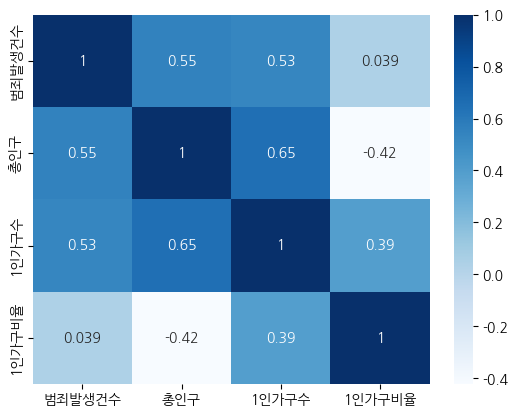

In [36]:
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams["axes.unicode_minus"] = False

sns.heatmap(my_corr, annot=True, cmap="Blues")
plt.show()

# 코로나 확진자/데이터 추가 merge

In [53]:
final_df = pd.merge(merged, from_covid, left_index=True, right_index=True)
final_df.head()

,범죄발생건수,총인구,1인가구수,1인가구비율,확진자수,사망자수
종로구,29709,1202294,200961,0.167148,"90,429",92
중구,31422,996763,174486,0.175053,"81,400",72
용산구,27058,1822056,282718,0.155164,"138,503",116
성동구,20788,2370726,327673,0.138216,"191,048",160
광진구,34110,2806290,475128,0.169308,"231,242",196


In [54]:
# 확진자수/사망자수 자료형 변경
final_df["확진자수"] = final_df["확진자수"].map(lambda x: int(str(x.replace(",", ""))))
final_df["사망자수"] = final_df["사망자수"].map(lambda x: int(str(x.replace(",", ""))))
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   범죄발생건수  25 non-null     int64  
 1   총인구     25 non-null     int64  
 2   1인가구수   25 non-null     int64  
 3   1인가구비율  25 non-null     float64
 4   확진자수    25 non-null     int64  
 5   사망자수    25 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 1.4+ KB


In [55]:
# 확진자 비율 열 생성
final_df["총인구_대비_확진자수"] = final_df["확진자수"] / final_df["총인구"]
final_df.head()

,범죄발생건수,총인구,1인가구수,1인가구비율,확진자수,사망자수,총인구_대비_확진자수
종로구,29709,1202294,200961,0.167148,90429,92,0.075214
중구,31422,996763,174486,0.175053,81400,72,0.081664
용산구,27058,1822056,282718,0.155164,138503,116,0.076015
성동구,20788,2370726,327673,0.138216,191048,160,0.080586
광진구,34110,2806290,475128,0.169308,231242,196,0.082401


In [56]:
# 사망자비율 열 생성
final_df["총인구_대비_사망자수"] = final_df["사망자수"] / final_df["총인구"]
final_df.head()

,범죄발생건수,총인구,1인가구수,1인가구비율,확진자수,사망자수,총인구_대비_확진자수,총인구_대비_사망자수
종로구,29709,1202294,200961,0.167148,90429,92,0.075214,0.000077
중구,31422,996763,174486,0.175053,81400,72,0.081664,0.000072
용산구,27058,1822056,282718,0.155164,138503,116,0.076015,0.000064
성동구,20788,2370726,327673,0.138216,191048,160,0.080586,0.000067
광진구,34110,2806290,475128,0.169308,231242,196,0.082401,0.000070


In [ ]:
# 시각화/통계

Axes(0.125,0.53;0.775x0.35)


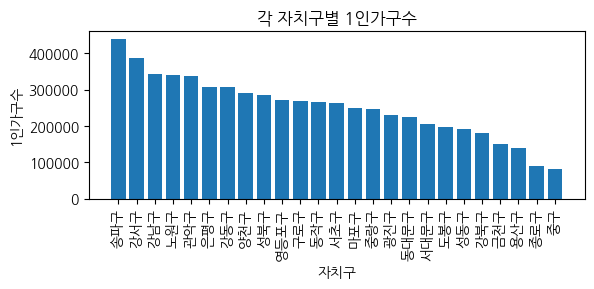

Axes(0.125,0.11;0.775x0.35)


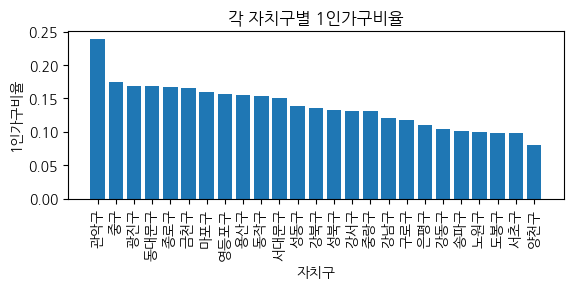

In [57]:
# 각 자치구별 1인가구수 bar plot로 내림차순서 표시
x1 = final_df.sort_values(by="확진자수", ascending=False).index
y1 = final_df.sort_values(by="확진자수", ascending=False)["확진자수"]

ax1 = plt.subplot(2,1,1)
plt.bar(x1, y1, data=merged)
plt.title("각 자치구별 1인가구수")
plt.xlabel("자치구")
plt.ylabel("1인가구수")
plt.xticks(rotation=90)
print(ax1)
plt.show()

# 각 자치구별 1인가구비율 bar plot로 내림차순서 표시
x2 = merged.sort_values(by="1인가구비율", ascending=False).index
y2 = merged.sort_values(by="1인가구비율", ascending=False)["1인가구비율"]

ax2 = plt.subplot(2,1,2)
plt.bar(x2, y2, data=merged)
plt.title("각 자치구별 1인가구비율")
plt.xlabel("자치구")
plt.ylabel("1인가구비율")
plt.xticks(rotation=90)
print(ax2)
plt.show()

# 관안구, 중구, 종로구

In [58]:
# 확진자수 가장 많은 자치구 top 3
final_df.sort_values(by="확진자수", ascending=False).head(3)

,범죄발생건수,총인구,1인가구수,1인가구비율,확진자수,사망자수,총인구_대비_확진자수,총인구_대비_사망자수
송파구,45240,5310324,534479,0.100649,440448,323,0.082942,0.000061
강서구,38697,4698661,619900,0.131931,388630,354,0.082711,0.000075
강남구,59752,4388682,530033,0.120773,342082,220,0.077946,0.000050


In [480]:
# 사망자수 가장 많은 자치구 top 3
final_df.sort_values(by="사망자수", ascending=False).head(3)

,범죄발생건수,총인구,1인가구수,1인가구비율,확진자수,사망자수,총인구_대비_확진자수,총인구_대비_사망자수
강동구,32857,3585390,374703,0.104508,307845,370,0.085861,0.000103
강서구,38697,4698661,619900,0.131931,388630,354,0.082711,0.000075
동대문구,30467,2776996,467693,0.168417,224284,350,0.080765,0.000126


In [59]:
# 총인구대비확진자수 가장 높은 자치구 top 3
final_df.sort_values(by="총인구_대비_확진자수", ascending=False).head(3)

,범죄발생건수,총인구,1인가구수,1인가구비율,확진자수,사망자수,총인구_대비_확진자수,총인구_대비_사망자수
영등포구,45033,2985115,468496,0.156944,271843,292,0.091066,0.000098
강동구,32857,3585390,374703,0.104508,307845,370,0.085861,0.000103
관악구,42486,3989373,954656,0.239300,336497,316,0.084348,0.000079


In [60]:
# 각 변수간 상관관계
my_corr2 = final_df.corr(method='pearson')
my_corr2

,범죄발생건수,총인구,1인가구수,1인가구비율,확진자수,사망자수,총인구_대비_확진자수,총인구_대비_사망자수
범죄발생건수,1.000000,0.551017,0.528124,0.038883,0.571573,0.291839,0.322956,-0.199162
총인구,0.551017,1.000000,0.652671,-0.423318,0.990387,0.738518,0.231421,-0.165829
1인가구수,0.528124,0.652671,1.000000,0.390108,0.692013,0.584972,0.444295,0.033495
1인가구비율,0.038883,-0.423318,0.390108,1.000000,-0.357914,-0.204340,0.295299,0.237432
확진자수,0.571573,0.990387,0.692013,-0.357914,1.000000,0.765906,0.359578,-0.117771
사망자수,0.291839,0.738518,0.584972,-0.204340,0.765906,1.000000,0.401695,0.527752
총인구_대비_확진자수,0.322956,0.231421,0.444295,0.295299,0.359578,0.401695,1.000000,0.276879
총인구_대비_사망자수,-0.199162,-0.165829,0.033495,0.237432,-0.117771,0.527752,0.276879,1.000000


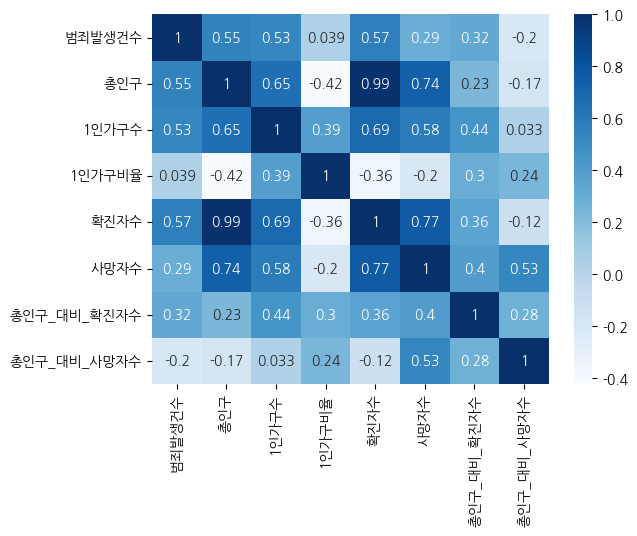

In [61]:
sns.heatmap(my_corr2, annot=True, cmap="Blues")
plt.show()


In [ ]:
# 의미 있는 내용

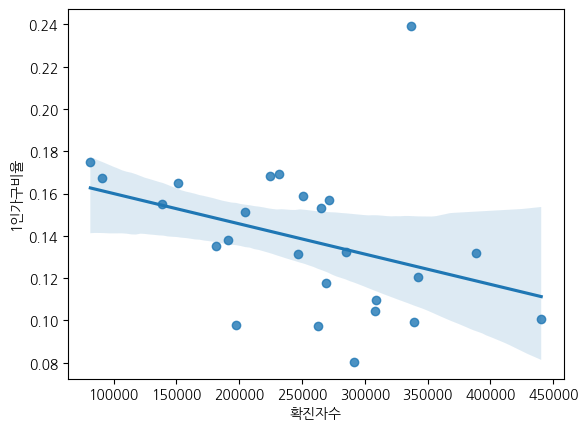

In [62]:
# 1. 1인가구 비율과 확진자수는 -0.35의 상관관계 / 사망자수는 -0.35의 상관관계
sns.regplot(x="확진자수", y="1인가구비율", data=final_df)
plt.show()
# 1인가구는 혼자 사니 집 안에서 감염 될 일이 없음. 또는 1인가구의 활동량이 더 적은 것도?

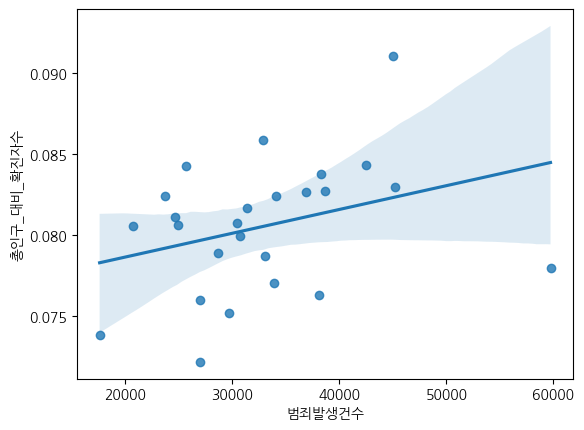

In [63]:
# 2. 총인구대비 확진자수(확진자비율)와 범죄발생건수 0.32의 상관관계
sns.regplot(x="범죄발생건수", y="총인구_대비_확진자수", data=final_df)
plt.show() 
# 범죄발생수 높은 지역 = 유동인구 많은 지역 = 확진자 비율(수 아님) 높다?

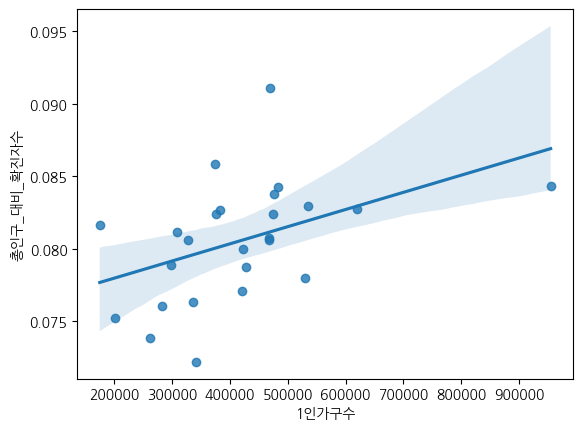

In [64]:
# 3. 총인구대비 확진자수(확진자비율)와 1인가구수 0.44의 상관관계
sns.regplot(x="1인가구수", y="총인구_대비_확진자수", data=final_df)
plt.show()
# 1인가구 수가 많을수록 확진자 비율이 높아진다?
# 아까 (확진자수 vs 1인가구비율 -0.32) 에서의 논리면 떨어져야 한다.
# OR 1인 가구수가 높은 지역들은 1인가구가 아닌 가구들이 훨씬 더 많기 때문에..?

# COVID 데이터

In [51]:
# 어떤 자치구가 누적 확진자수가 가장 많은가? 전체 인구대비 확진자수가 많은 구는?
# 코로나가 제일 심했을 시기? 최근에는 어떤가? 어떤 패턴을 보이는가? (겨울에는 적어진다거나 등. 또는 연휴에 많아진다거나)

In [37]:
covid = pd.read_csv("data-files/covid.csv")
covid.info()
covid.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 57 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0       구분       1285 non-null   object
 1   총합계          1286 non-null   object
 2   Unnamed: 2   1286 non-null   object
 3   강남구          1286 non-null   object
 4   Unnamed: 4   1286 non-null   object
 5   강동구          1286 non-null   object
 6   Unnamed: 6   1286 non-null   object
 7   강북구          1286 non-null   object
 8   Unnamed: 8   1286 non-null   object
 9   강서구          1286 non-null   object
 10  Unnamed: 10  1286 non-null   object
 11  관악구          1286 non-null   object
 12  Unnamed: 12  1286 non-null   object
 13  광진구          1286 non-null   object
 14  Unnamed: 14  1286 non-null   object
 15  구로구          1286 non-null   object
 16  Unnamed: 16  1286 non-null   object
 17  금천구          1286 non-null   object
 18  Unnamed: 18  1286 non-null   object
 19  노원구          1286 non-null 

,구분,총합계,Unnamed: 2,강남구,Unnamed: 4,강동구,Unnamed: 6,강북구,Unnamed: 8,강서구,...,종로구,Unnamed: 48,중구,Unnamed: 50,중랑구,Unnamed: 52,기타,Unnamed: 54,타시도,Unnamed: 56
0,NaN,확진,사망,확진,사망,확진,사망,확진,사망,확진,...,확진,사망,확진,사망,확진,사망,확진,사망,확진,사망
1,2020-01-24,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-30,3,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,2020-01-31,3,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
4,2020-02-02,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [38]:
#새로 변경해줄 새 컬럼명 리스트 (확진, 사망 전부 유지)
new_name = [] 
for a in covid.columns[1: :2]:
    new_name.append(f"{a}확진")
    new_name.append(f"{a}사망")
new_name

['총합계확진',
 '총합계사망',
 '강남구확진',
 '강남구사망',
 '강동구확진',
 '강동구사망',
 '강북구확진',
 '강북구사망',
 '강서구확진',
 '강서구사망',
 '관악구확진',
 '관악구사망',
 '광진구확진',
 '광진구사망',
 '구로구확진',
 '구로구사망',
 '금천구확진',
 '금천구사망',
 '노원구확진',
 '노원구사망',
 '도봉구확진',
 '도봉구사망',
 '동대문구확진',
 '동대문구사망',
 '동작구확진',
 '동작구사망',
 '마포구확진',
 '마포구사망',
 '서대문구확진',
 '서대문구사망',
 '서초구확진',
 '서초구사망',
 '성동구확진',
 '성동구사망',
 '성북구확진',
 '성북구사망',
 '송파구확진',
 '송파구사망',
 '양천구확진',
 '양천구사망',
 '영등포구확진',
 '영등포구사망',
 '용산구확진',
 '용산구사망',
 '은평구확진',
 '은평구사망',
 '종로구확진',
 '종로구사망',
 '중구확진',
 '중구사망',
 '중랑구확진',
 '중랑구사망',
 '기타확진',
 '기타사망',
 '타시도확진',
 '타시도사망']

In [39]:
# .rename 에 넣어줄 dict 생성
covid_dict = {} 
for original, new in zip(covid.columns[1:], new_name):
    covid_dict.update({original:new})
covid_dict

{'총합계': '총합계확진',
 'Unnamed: 2': '총합계사망',
 '강남구': '강남구확진',
 'Unnamed: 4': '강남구사망',
 '강동구': '강동구확진',
 'Unnamed: 6': '강동구사망',
 '강북구': '강북구확진',
 'Unnamed: 8': '강북구사망',
 '강서구': '강서구확진',
 'Unnamed: 10': '강서구사망',
 '관악구': '관악구확진',
 'Unnamed: 12': '관악구사망',
 '광진구': '광진구확진',
 'Unnamed: 14': '광진구사망',
 '구로구': '구로구확진',
 'Unnamed: 16': '구로구사망',
 '금천구': '금천구확진',
 'Unnamed: 18': '금천구사망',
 '노원구': '노원구확진',
 'Unnamed: 20': '노원구사망',
 '도봉구': '도봉구확진',
 'Unnamed: 22': '도봉구사망',
 '동대문구': '동대문구확진',
 'Unnamed: 24': '동대문구사망',
 '동작구': '동작구확진',
 'Unnamed: 26': '동작구사망',
 '마포구': '마포구확진',
 'Unnamed: 28': '마포구사망',
 '서대문구': '서대문구확진',
 'Unnamed: 30': '서대문구사망',
 '서초구': '서초구확진',
 'Unnamed: 32': '서초구사망',
 '성동구': '성동구확진',
 'Unnamed: 34': '성동구사망',
 '성북구': '성북구확진',
 'Unnamed: 36': '성북구사망',
 '송파구': '송파구확진',
 'Unnamed: 38': '송파구사망',
 '양천구': '양천구확진',
 'Unnamed: 40': '양천구사망',
 '영등포구': '영등포구확진',
 'Unnamed: 42': '영등포구사망',
 '용산구': '용산구확진',
 'Unnamed: 44': '용산구사망',
 '은평구': '은평구확진',
 'Unnamed: 46': '은평구사망',
 '종로구': '종로구확진',
 'Unnamed: 4

In [40]:
# 컬럼명 rename
covid.rename(columns=covid_dict,inplace=True)
covid.head()

,구분,총합계확진,총합계사망,강남구확진,강남구사망,강동구확진,강동구사망,강북구확진,강북구사망,강서구확진,...,종로구확진,종로구사망,중구확진,중구사망,중랑구확진,중랑구사망,기타확진,기타사망,타시도확진,타시도사망
0,NaN,확진,사망,확진,사망,확진,사망,확진,사망,확진,...,확진,사망,확진,사망,확진,사망,확진,사망,확진,사망
1,2020-01-24,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-30,3,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,2020-01-31,3,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
4,2020-02-02,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [41]:
# 필요 없는 끝 열들 삭제
covid = covid.iloc[: , :-4] #타시도, 기타 열 제거
covid.head()

,구분,총합계확진,총합계사망,강남구확진,강남구사망,강동구확진,강동구사망,강북구확진,강북구사망,강서구확진,...,용산구확진,용산구사망,은평구확진,은평구사망,종로구확진,종로구사망,중구확진,중구사망,중랑구확진,중랑구사망
0,NaN,확진,사망,확진,사망,확진,사망,확진,사망,확진,...,확진,사망,확진,사망,확진,사망,확진,사망,확진,사망
1,2020-01-24,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-30,3,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2020-01-31,3,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,2020-02-02,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# 0번째 index 삭제
covid.drop([0], inplace=True)
covid.head()

,구분,총합계확진,총합계사망,강남구확진,강남구사망,강동구확진,강동구사망,강북구확진,강북구사망,강서구확진,...,용산구확진,용산구사망,은평구확진,은평구사망,종로구확진,종로구사망,중구확진,중구사망,중랑구확진,중랑구사망
1,2020-01-24,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-30,3,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2020-01-31,3,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,2020-02-02,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2020-02-05,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# reset index
covid.reset_index(drop=True, inplace=True)
covid.head()

,구분,총합계확진,총합계사망,강남구확진,강남구사망,강동구확진,강동구사망,강북구확진,강북구사망,강서구확진,...,용산구확진,용산구사망,은평구확진,은평구사망,종로구확진,종로구사망,중구확진,중구사망,중랑구확진,중랑구사망
0,2020-01-24,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-30,3,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2020-01-31,3,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,2020-02-02,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-02-05,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 구별 총 확진자/사망자 추출

In [44]:
# 구분, 총합계 열 3개 제외
new_covid = covid.iloc[: , 3:]
new_covid.tail()

,강남구확진,강남구사망,강동구확진,강동구사망,강북구확진,강북구사망,강서구확진,강서구사망,관악구확진,관악구사망,...,용산구확진,용산구사망,은평구확진,은평구사망,종로구확진,종로구사망,중구확진,중구사망,중랑구확진,중랑구사망
1280,452,0,459,0,223,0,503,0,354,0,...,177,0,377,0,99,0,104,0,355,0
1281,399,0,382,0,220,1,411,1,370,0,...,145,0,347,0,98,0,79,0,286,0
1282,308,0,305,0,156,0,375,0,290,0,...,105,1,348,0,69,0,82,0,256,0
1283,148,0,99,0,43,0,130,0,111,0,...,26,0,107,0,19,0,21,0,60,0
1284,"342,082",220,"307,845",370,"181,638",241,"388,630",354,"336,497",316,...,"138,503",116,"308,515",277,"90,429",92,"81,400",72,"246,591",241


In [45]:
#총확진자수만 담긴 df 추출
sick_all = new_covid.iloc[1284: , 0: :2]
sick_all.head()

,강남구확진,강동구확진,강북구확진,강서구확진,관악구확진,광진구확진,구로구확진,금천구확진,노원구확진,도봉구확진,...,성동구확진,성북구확진,송파구확진,양천구확진,영등포구확진,용산구확진,은평구확진,종로구확진,중구확진,중랑구확진
1284,"342,082","307,845","181,638","388,630","336,497","231,242","269,311","151,392","339,385","197,151",...,"191,048","284,602","440,448","291,695","271,843","138,503","308,515","90,429","81,400","246,591"


In [46]:
# .transpose 로 행/열 전환
sick_all = sick_all.transpose()
sick_all.rename(columns={1284:"확진자수"}, inplace=True) #컬럼명 '확진자수'로 변경
sick_all.head()

,확진자수
강남구확진,"342,082"
강동구확진,"307,845"
강북구확진,"181,638"
강서구확진,"388,630"
관악구확진,"336,497"


In [47]:
# 자치구 명에서 '확진' 제거
new_index = [y.replace("확진", "") for y in list(sick_all.index)]
sick_all.index = new_index
sick_all.head()

,확진자수
강남구,"342,082"
강동구,"307,845"
강북구,"181,638"
강서구,"388,630"
관악구,"336,497"


In [48]:
#총사망자 담긴 df 추출
die_all = new_covid.iloc[1284: , 1: :2] 
die_all = die_all.transpose()
die_all.rename(columns={1284:"사망자수"}, inplace=True)
die_all.head()

,사망자수
강남구사망,220
강동구사망,370
강북구사망,241
강서구사망,354
관악구사망,316


In [51]:
# "사망" 단어 제거
new_index2 = [y.replace("사망", "") for y in list(die_all.index)]
die_all.index = new_index2
die_all.head()

,사망자수
강남구,220
강동구,370
강북구,241
강서구,354
관악구,316


In [52]:
# 위 두 df 우선 merge
from_covid = pd.merge(sick_all, die_all, left_index=True, right_index=True)
from_covid.head()

,확진자수,사망자수
강남구,"342,082",220
강동구,"307,845",370
강북구,"181,638",241
강서구,"388,630",354
관악구,"336,497",316


# 구별 총 확진자/사망자 추출 End. 코로나 확진자 추이 시각화

In [65]:
covid.head()

,구분,총합계확진,총합계사망,강남구확진,강남구사망,강동구확진,강동구사망,강북구확진,강북구사망,강서구확진,...,용산구확진,용산구사망,은평구확진,은평구사망,종로구확진,종로구사망,중구확진,중구사망,중랑구확진,중랑구사망
0,2020-01-24,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-30,3,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2020-01-31,3,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,2020-02-02,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-02-05,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# "구분"(날짜) 열 제외하고 전부 int로 변경
for col in covid.columns[1:]:
    covid[col] = covid[col].map(lambda x: int(str(x).replace(",", "")))
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285 entries, 0 to 1284
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0       구분  1285 non-null   object
 1   총합계확진   1285 non-null   int64 
 2   총합계사망   1285 non-null   int64 
 3   강남구확진   1285 non-null   int64 
 4   강남구사망   1285 non-null   int64 
 5   강동구확진   1285 non-null   int64 
 6   강동구사망   1285 non-null   int64 
 7   강북구확진   1285 non-null   int64 
 8   강북구사망   1285 non-null   int64 
 9   강서구확진   1285 non-null   int64 
 10  강서구사망   1285 non-null   int64 
 11  관악구확진   1285 non-null   int64 
 12  관악구사망   1285 non-null   int64 
 13  광진구확진   1285 non-null   int64 
 14  광진구사망   1285 non-null   int64 
 15  구로구확진   1285 non-null   int64 
 16  구로구사망   1285 non-null   int64 
 17  금천구확진   1285 non-null   int64 
 18  금천구사망   1285 non-null   int64 
 19  노원구확진   1285 non-null   int64 
 20  노원구사망   1285 non-null   int64 
 21  도봉구확진   1285 non-null   int64 
 22  도봉구사망   1285 non-null   

In [67]:
# "구분" 행 명 변경
covid.rename(columns={"    구분":"일자"}, inplace=True)
covid.head()

,일자,총합계확진,총합계사망,강남구확진,강남구사망,강동구확진,강동구사망,강북구확진,강북구사망,강서구확진,...,용산구확진,용산구사망,은평구확진,은평구사망,종로구확진,종로구사망,중구확진,중구사망,중랑구확진,중랑구사망
0,2020-01-24,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-30,3,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2020-01-31,3,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,2020-02-02,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-02-05,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
# 맨 마지막 행 "구별" 합계 제거
covid.drop([1284], inplace=True)
covid.tail()

,일자,총합계확진,총합계사망,강남구확진,강남구사망,강동구확진,강동구사망,강북구확진,강북구사망,강서구확진,...,용산구확진,용산구사망,은평구확진,은평구사망,종로구확진,종로구사망,중구확진,중구사망,중랑구확진,중랑구사망
1279,2023-08-27,1905,1,121,0,116,0,32,0,118,...,32,0,165,0,10,0,29,0,41,0
1280,2023-08-28,8485,1,452,0,459,0,223,0,503,...,177,0,377,0,99,0,104,0,355,0
1281,2023-08-29,7470,5,399,0,382,0,220,1,411,...,145,0,347,0,98,0,79,0,286,0
1282,2023-08-30,6423,3,308,0,305,0,156,0,375,...,105,1,348,0,69,0,82,0,256,0
1283,2023-08-31,2141,3,148,0,99,0,43,0,130,...,26,0,107,0,19,0,21,0,60,0


In [69]:
#일자 데이터를 datetime 자료형식으로 바꿔줌으로 plot할 때 x축에 date표시
covid["일자"] = pd.to_datetime(covid["일자"])
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      1284 non-null   datetime64[ns]
 1   총합계확진   1284 non-null   int64         
 2   총합계사망   1284 non-null   int64         
 3   강남구확진   1284 non-null   int64         
 4   강남구사망   1284 non-null   int64         
 5   강동구확진   1284 non-null   int64         
 6   강동구사망   1284 non-null   int64         
 7   강북구확진   1284 non-null   int64         
 8   강북구사망   1284 non-null   int64         
 9   강서구확진   1284 non-null   int64         
 10  강서구사망   1284 non-null   int64         
 11  관악구확진   1284 non-null   int64         
 12  관악구사망   1284 non-null   int64         
 13  광진구확진   1284 non-null   int64         
 14  광진구사망   1284 non-null   int64         
 15  구로구확진   1284 non-null   int64         
 16  구로구사망   1284 non-null   int64         
 17  금천구확진   1284 non-null   int64         
 18  금천구사망   

In [ ]:
# 일자 열에서 year/month를 별도 열로 만들기
covid["month"] = covid["일자"].dt.month
covid["year"] = covid['일자'].dt.year
covid.head()

In [164]:
covid = covid[['일자', 'year', 'month', '총합계확진', '총합계사망', '강남구확진', '강남구사망', '강동구확진', '강동구사망', '강북구확진',
       '강북구사망', '강서구확진', '강서구사망', '관악구확진', '관악구사망', '광진구확진', '광진구사망', '구로구확진',
       '구로구사망', '금천구확진', '금천구사망', '노원구확진', '노원구사망', '도봉구확진', '도봉구사망', '동대문구확진',
       '동대문구사망', '동작구확진', '동작구사망', '마포구확진', '마포구사망', '서대문구확진', '서대문구사망',
       '서초구확진', '서초구사망', '성동구확진', '성동구사망', '성북구확진', '성북구사망', '송파구확진', '송파구사망',
       '양천구확진', '양천구사망', '영등포구확진', '영등포구사망', '용산구확진', '용산구사망', '은평구확진',
       '은평구사망', '종로구확진', '종로구사망', '중구확진', '중구사망', '중랑구확진', '중랑구사망', '기타확진',
       '기타사망', '타시도확진', '타시도사망']]
covid.head()

,일자,year,month,총합계확진,총합계사망,강남구확진,강남구사망,강동구확진,강동구사망,강북구확진,...,종로구확진,종로구사망,중구확진,중구사망,중랑구확진,중랑구사망,기타확진,기타사망,타시도확진,타시도사망
0,2020-01-24,2020,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-30,2020,1,3,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,2020-01-31,2020,1,3,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
3,2020-02-02,2020,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2020-02-05,2020,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [195]:
# 진짜 겨울(추운 날씨)에 코로나가 심해지고, 여름에는 덜해지나? (겨울=12~2) (여름=6~8)
Dec = covid[covid["month"] ==12]
Jan = covid[covid["month"] ==1]
Feb = covid[covid["month"] ==2]

In [186]:
covid_from2022 = covid[676:]
covid_from2023 = covid[1041:]

Axes(0.125,0.53;0.775x0.35)


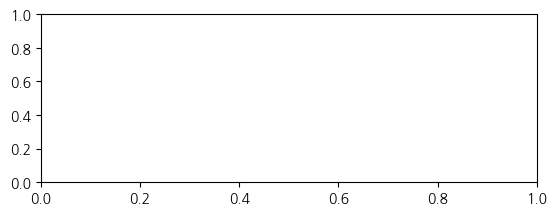

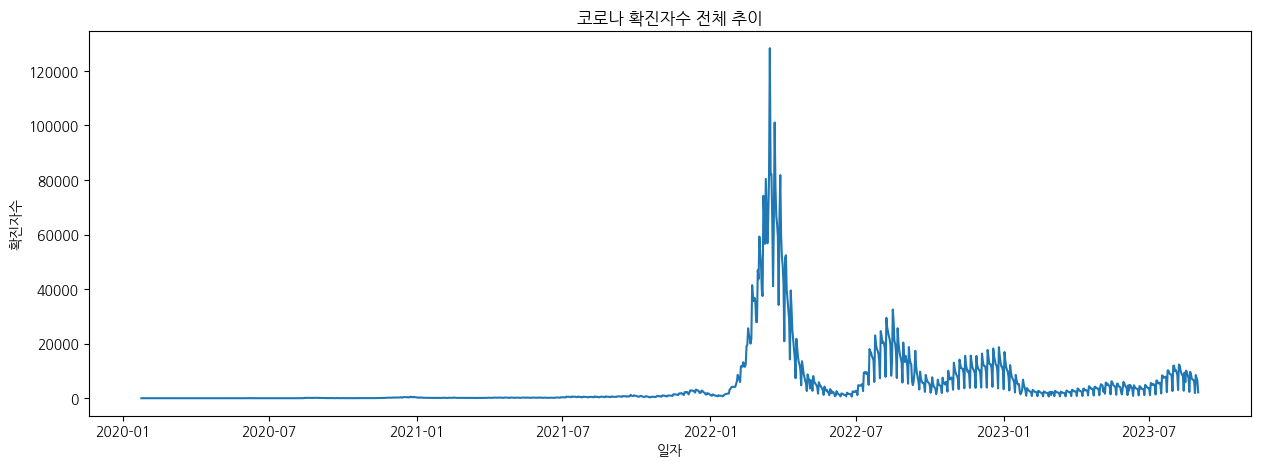

Axes(0.125,0.11;0.775x0.35)


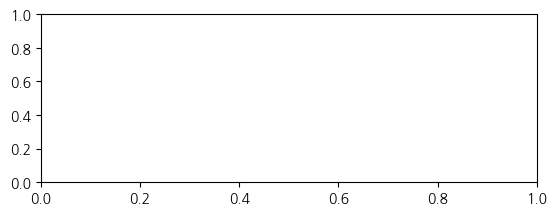

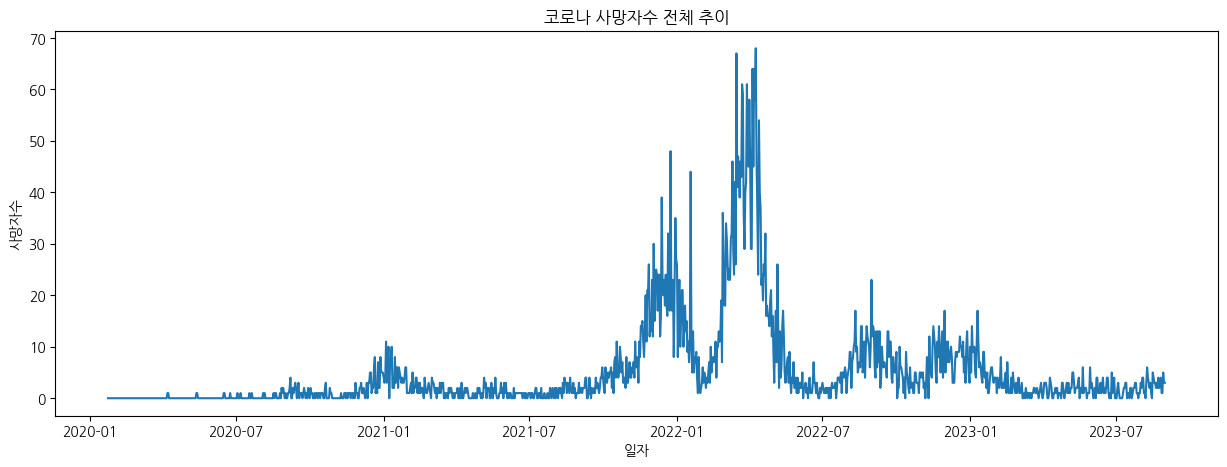

In [70]:
# 전체 기간 확진자 추이
ax1 = plt.subplot(2,1,1)
plt.figure(figsize=(15,5))
plt.plot(covid["일자"], covid["총합계확진"])
plt.title("코로나 확진자수 전체 추이")
plt.ylabel("확진자수")
plt.xlabel("일자")
print(ax1)
plt.show()

ax2 = plt.subplot(2,1,2)
plt.figure(figsize=(15,5))
plt.plot(covid["일자"], covid["총합계사망"])
plt.title("코로나 사망자수 전체 추이")
plt.ylabel("사망자수")
plt.xlabel("일자")
print(ax2)
plt.show()

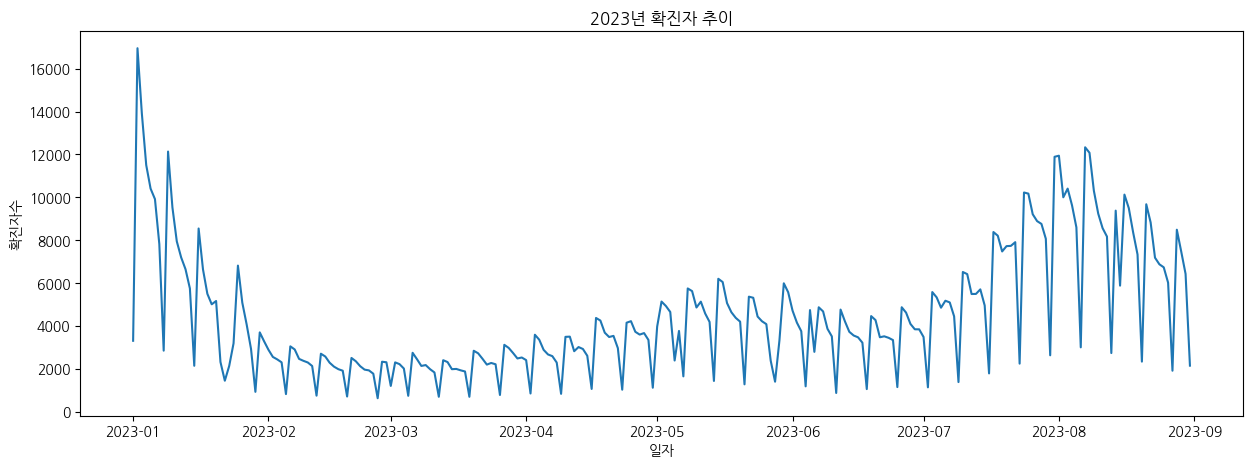

In [207]:
# 올해 추이(2023년)
plt.figure(figsize=(15,5))
plt.plot(covid_from2023["일자"], covid_from2023["총합계확진"])
plt.title("2023년 확진자 추이")
plt.ylabel("확진자수")
plt.xlabel("일자")
plt.show()

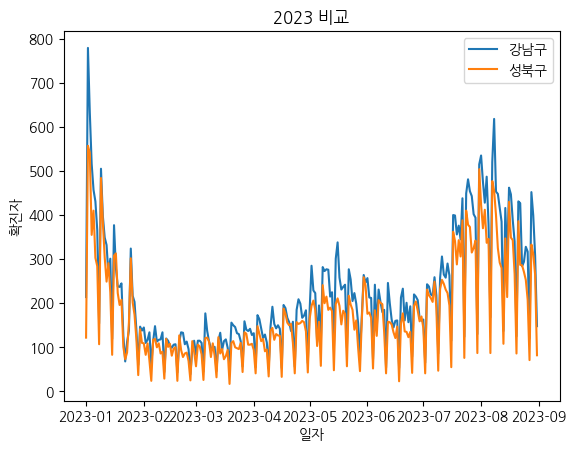

In [527]:
plt.plot(covid_from2023['일자'], covid_from2023['강남구확진'], label='강남구')
plt.plot(covid_from2023['일자'], covid_from2023['성북구확진'], label='성북구')

plt.xlabel('일자')
plt.ylabel('확진자')
plt.title('2023 비교')
plt.legend()
plt.show()

출처
https://data.seoul.go.kr/dataList/10994/S/2/datasetView.do [1인가구]
https://data.seoul.go.kr/dataList/10790/S/2/datasetView.do [인구밀도] X
https://data.seoul.go.kr/dataList/316/S/2/datasetView.do [범죄율]   